In [24]:
import datasets
import numpy as np
import pandas as pd
dl_manager = datasets.DownloadManager()
_DOWNLOAD_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip'
archive = dl_manager.download(_DOWNLOAD_URL)

In [25]:
for path, f in dl_manager.iter_archive(archive):
    if path[-3:] == 'csv':
        df = pd.read_csv(f)

In [26]:
df.columns = df.columns.str.strip()

<AxesSubplot:>

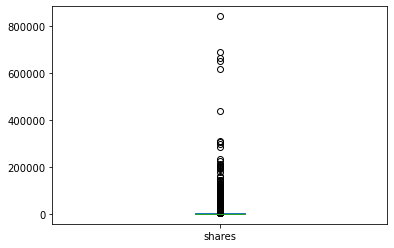

In [27]:
df.shares.plot.box()

In [28]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df.iloc[:, 1:], minimal = True)
# profile

# Findings

* n_unique_tokens, n_non_stop_words, n_non_stop_unique_tokens should be between 0 and 1, because they are proportions +

* Check if data_channel_is_* are non-overlaping variables +
    - convert them to a categorical variable

* "num_keywords" indicates how many key words in the article; related variables are kw\_\*\_\* where * $\in$ {min,avg,max} +
    - When they are -1, it needs to be converted to 0
    
* "num_self_hrefs" indicates how many Marshable's own articles are linked in the article; related variables are self_reference_\*\_shares
    
* weekday_is_\* and is_weekend can be treated as a single categorical variable

* By its proximity to LDA_00, ..., LDA_04, it can be treated as a categotical variable

* polarity is between -1 and 1 (negative is between -1 and 0; positive is between 0 and 1)

* subjectivity is between 0 and 1

In [29]:
# n_unique_tokens
df.n_unique_tokens.lt(0).sum(), df.n_unique_tokens.gt(1).sum()

(0, 1)

In [30]:
# n_non_stop_words
df.n_non_stop_words.lt(0).sum(), df.n_non_stop_words.gt(1).sum()

(0, 1)

In [31]:
# n_non_stop_words
df.n_non_stop_unique_tokens.lt(0).sum(), df.n_non_stop_unique_tokens.gt(1).sum()

(0, 1)

In [32]:
df = df.loc[df.n_unique_tokens.le(1),:].reset_index(drop = True)

### Data Channel Variables remain as they are, because they need to be represented as in the design matrix

In [33]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [34]:
# replacing -1 in kw_*_* to 0
df = df.replace({colname: {-1:0} for colname in df.columns[df.columns.str.contains('kw_\w+_\w+')]})

In [35]:
# No Monday, Thursday, or Friday weekend
week = df.loc[:, df.columns.str.contains('week')]
week.T.dot(week)

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend
weekday_is_monday,6661.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
weekday_is_tuesday,0.0,7389.0,0.0,0.0,0.0,0.0,0.0,0.0
weekday_is_wednesday,0.0,0.0,7435.0,0.0,0.0,0.0,0.0,0.0
weekday_is_thursday,0.0,0.0,0.0,7267.0,0.0,0.0,0.0,0.0
weekday_is_friday,0.0,0.0,0.0,0.0,5701.0,0.0,0.0,0.0
weekday_is_saturday,0.0,0.0,0.0,0.0,0.0,2453.0,0.0,2453.0
weekday_is_sunday,0.0,0.0,0.0,0.0,0.0,0.0,2737.0,2737.0
is_weekend,0.0,0.0,0.0,0.0,0.0,2453.0,2737.0,5190.0


In [36]:
df = df.drop('is_weekend', axis = 1)

In [37]:
# We don't need to transform LDA as it indicates the probability each observation falls into 

In [38]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'LDA_00', 'LDA_01',
       'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate

In [39]:
lda = df.loc[:, df.columns.str.contains('LDA_')]
lda.T.dot(lda)

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04
LDA_00,4092.480323,622.965962,831.402778,792.584111,978.811497
LDA_01,622.965962,2704.643957,641.946437,940.301129,690.086385
LDA_02,831.402778,641.946437,5010.948823,833.921628,1257.608741
LDA_03,792.584111,940.301129,833.921628,5439.482373,864.833437
LDA_04,978.811497,690.086385,1257.608741,864.833437,5486.520317


In [40]:
df = df.drop('n_non_stop_words', axis = 1)

In [42]:
# df['shares_class'] = pd.qcut(df.shares, 20, range(20))
df['shares_class'] = df.shares.apply(lambda x: 'pos' if x>1400 else 'neg')

In [43]:
df.shares_class

0        neg
1        neg
2        pos
3        neg
4        neg
        ... 
39638    pos
39639    pos
39640    pos
39641    neg
39642    neg
Name: shares_class, Length: 39643, dtype: object

In [44]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'LDA_00', 'LDA_01',
       'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'r

In [45]:
df.drop(['url','timedelta','shares'], axis = 1).to_csv('text_summary_stats.csv', 
                                                             index = False)

In [ ]:
# run the python script that obtain texts from url
!python data_prep.py